In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import matplotlib.ticker as tkr
import quandl

In [2]:
GSPC = wb.DataReader('^GSPC',data_source='yahoo',start='2010-01-01')
GOOGL = wb.DataReader('GOOGL',data_source='yahoo',start='2010-01-01')
MSFT = wb.DataReader('MSFT',data_source='yahoo',start='2010-01-01')
AAPL = wb.DataReader('AAPL',data_source='yahoo',start='2010-01-01')

In [3]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.307869
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.342979
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.019398
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,19.982389
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.115240


# Portfolio Allocation

In [4]:
for stock_df in (GOOGL,MSFT,AAPL):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [5]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690,1.000000
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312,0.995596
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448,0.970499
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351,0.947906
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310,0.960542


In [6]:
for stock_df,allo in zip ([GOOGL,MSFT,AAPL],[.3,.3,.4]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [7]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690,1.000000,0.300000
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312,0.995596,0.298679
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448,0.970499,0.291150
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351,0.947906,0.284372
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310,0.960542,0.288163


#### We hypothetically placed 100k in this portfolio

In [8]:
for stock_df in (GOOGL,MSFT,AAPL):
    stock_df['Position Values'] = stock_df['Allocation'] * 100000

In [9]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation,Position Values
Date,,,,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690,1.000000,0.300000,30000.000000
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312,0.995596,0.298679,29867.890216
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448,0.970499,0.291150,29114.959299
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351,0.947906,0.284372,28437.176128
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310,0.960542,0.288163,28816.274151


In [10]:
portfolio_val = pd.concat([GOOGL['Position Values'],MSFT['Position Values'],AAPL['Position Values']],axis=1)
portfolio_val.columns = ['GOOGL Pos','MSFT Pos','AAPL Pos']
portfolio_val.head()

,GOOGL Pos,MSFT Pos,AAPL Pos
Date,,,
2010-01-04,30000.000000,30000.000000,40000.000000
2010-01-05,29867.890216,30009.691890,40069.156392
2010-01-06,29114.959299,29825.515647,39431.804051
2010-01-07,28437.176128,29515.340165,39358.909577
2010-01-08,28816.274151,29718.893190,39620.582818


In [11]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,GOOGL Pos,MSFT Pos,AAPL Pos,Total Pos
Date,,,,
2010-01-04,30000.000000,30000.000000,40000.000000,100000.000000
2010-01-05,29867.890216,30009.691890,40069.156392,99946.738498
2010-01-06,29114.959299,29825.515647,39431.804051,98372.278996
2010-01-07,28437.176128,29515.340165,39358.909577,97311.425871
2010-01-08,28816.274151,29718.893190,39620.582818,98155.750158


Text(0.5,1,'Total Portfolio Value')

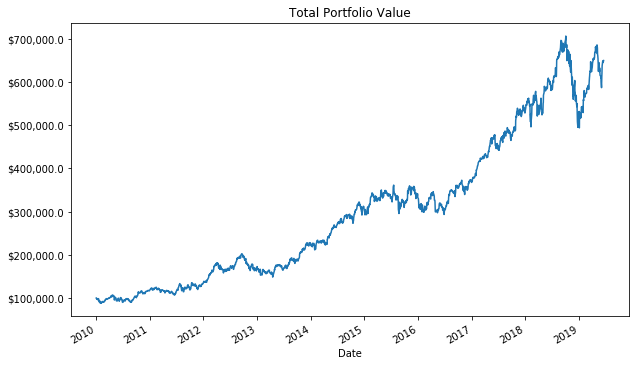

In [12]:
total_pos_graphed = portfolio_val['Total Pos'].plot(figsize=(10,6))
total_pos_graphed.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x,loc:'${:,}'.format(x)))
plt.title('Total Portfolio Value')

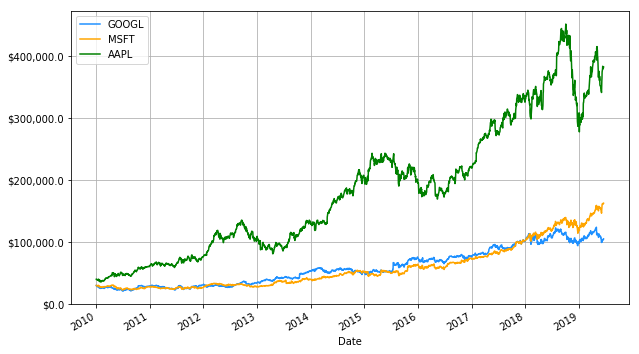

In [13]:
portfolio_val_graphed = portfolio_val['GOOGL Pos'].plot(figsize=(10,6),label='GOOGL',color='dodgerblue')
portfolio_val['MSFT Pos'].plot(label='MSFT',color='orange')
portfolio_val['AAPL Pos'].plot(label='AAPL',color='green')
plt.legend()
portfolio_val_graphed.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x,loc:'${:,}'.format(x)))
plt.grid()

In [14]:
portfolio_val.tail()

,GOOGL Pos,MSFT Pos,AAPL Pos,Total Pos
Date,,,,
2019-06-11,103386.580985,161590.098376,383713.324064,648690.003424
2019-06-12,103201.040651,160843.920828,382492.132183,646537.093662
2019-06-13,104340.071278,161859.212814,382413.328159,648612.612250
2019-06-14,103889.628426,162018.221407,379636.102432,645543.952265
2019-06-17,104921.535281,162758.276779,382433.044192,650112.856252


In [15]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val.tail()

,GOOGL Pos,MSFT Pos,AAPL Pos,Total Pos,Daily Return
Date,,,,,
2019-06-11,103386.580985,161590.098376,383713.324064,648690.003424,0.005606
2019-06-12,103201.040651,160843.920828,382492.132183,646537.093662,-0.003319
2019-06-13,104340.071278,161859.212814,382413.328159,648612.612250,0.003210
2019-06-14,103889.628426,162018.221407,379636.102432,645543.952265,-0.004731
2019-06-17,104921.535281,162758.276779,382433.044192,650112.856252,0.007078


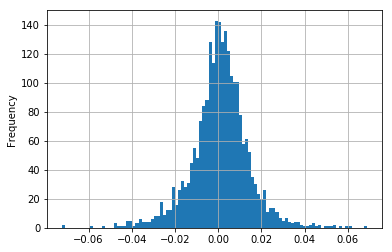

In [16]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100)
plt.grid()

## Cumulative Return

In [17]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)
print('The return was {:.2f}%'.format(cumulative_return))

The return was 550.11%


In [18]:
print('This is your total cash ${:.2f}'.format(portfolio_val['Total Pos'][-1]))

This is your total cash $650112.86


In [19]:
portfolio_val.tail(1)

,GOOGL Pos,MSFT Pos,AAPL Pos,Total Pos,Daily Return
Date,,,,,
2019-06-17,104921.535281,162758.276779,382433.044192,650112.856252,0.007078


## Sharpe Ratio

$$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [20]:
sharpe_ratio = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
sharpe_ratio

0.06574248727863434

#### Sharpe Ratio is meant to be a yearly data source (252 trading days in a year)

In [21]:
annualized_sharpe_ratio = (252 ** 0.5)* sharpe_ratio
annualized_sharpe_ratio

1.043629631460564

## Monte Carlo Simulation


In [22]:
portfolio_df = pd.concat([GOOGL['Close'],MSFT['Close'],AAPL['Close']],axis=1)
portfolio_df.columns = ['GOOGL Close','MSFT Close','AAPL Close']
portfolio_df.tail()

,GOOGL Close,MSFT Close,AAPL Close
Date,,,
2019-06-11,1081.040039,132.100006,194.809998
2019-06-12,1079.099976,131.490005,194.190002
2019-06-13,1091.010010,132.320007,194.149994
2019-06-14,1086.300049,132.449997,192.740005
2019-06-17,1097.089966,133.054993,194.160004


In [23]:
portfolio_df.pct_change(1).corr()

,GOOGL Close,MSFT Close,AAPL Close
GOOGL Close,1.000000,0.530402,0.458688
MSFT Close,0.530402,1.000000,0.448875
AAPL Close,0.458688,0.448875,1.000000


#### Logarithmic Returns

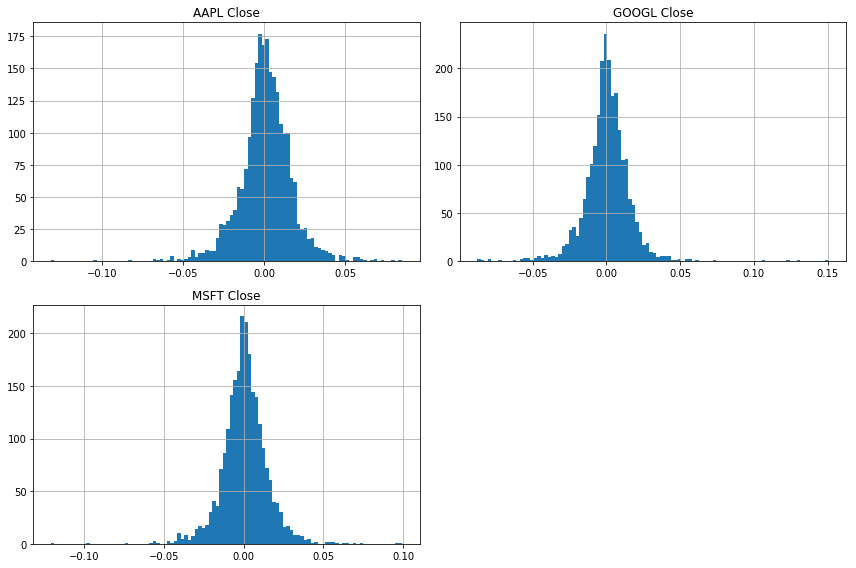

In [24]:
portfolio_log_returns = np.log(portfolio_df/portfolio_df.shift(1))
portfolio_log_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout()

# Portfolio Optimization

In [25]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation,Position Values
Date,,,,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690,1.000000,0.300000,30000.000000
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312,0.995596,0.298679,29867.890216
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448,0.970499,0.291150,29114.959299
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351,0.947906,0.284372,28437.176128
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310,0.960542,0.288163,28816.274151


In [26]:
stock_data_df = pd.concat([GOOGL['Close'],MSFT['Close'],AAPL['Close']],axis=1)
stock_data_df.columns = ['GOOGL','MSFT','AAPL']
stock_data_df.tail()

,GOOGL,MSFT,AAPL
Date,,,
2019-06-11,1081.040039,132.100006,194.809998
2019-06-12,1079.099976,131.490005,194.190002
2019-06-13,1091.010010,132.320007,194.149994
2019-06-14,1086.300049,132.449997,192.740005
2019-06-17,1097.089966,133.054993,194.160004


In [27]:
stock_daily_return = stock_data_df.pct_change(1)
stock_daily_return.head()

,GOOGL,MSFT,AAPL
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,-0.004404,0.000323,0.001729
2010-01-06,-0.025209,-0.006137,-0.015906
2010-01-07,-0.023280,-0.010400,-0.001849
2010-01-08,0.013331,0.006897,0.006648


In [28]:
log_return = np.log(stock_data_df/stock_data_df.shift(1))
log_return.head()

,GOOGL,MSFT,AAPL
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,-0.004413,0.000323,0.001727
2010-01-06,-0.025532,-0.006156,-0.016034
2010-01-07,-0.023555,-0.010454,-0.001850
2010-01-08,0.013243,0.006873,0.006626


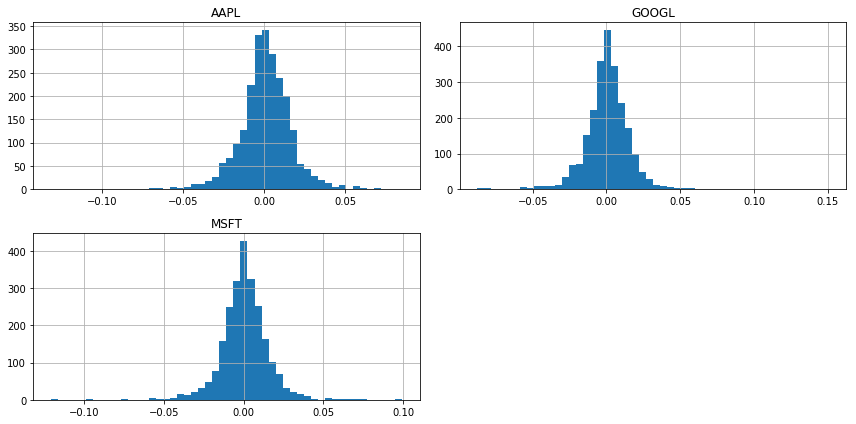

In [29]:
log_return.hist(bins=50,figsize=(12,6))
plt.tight_layout()

In [30]:
np.random.seed(101)
number_of_portfolios = 15000

all_weights = np.zeros((number_of_portfolios,len(stock_data_df.columns)))
return_array = np.zeros(number_of_portfolios)
volatility_array = np.zeros(number_of_portfolios)
sharpe_array = np.zeros(number_of_portfolios)

for ind in range(number_of_portfolios):

    # Create Random Weights
    weights = np.array(np.random.random(3))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    return_array[ind] = np.sum((log_return.mean() * weights) *252)

    # Expected Variance
    volatility_array[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_array[ind] = return_array[ind]/volatility_array[ind]

In [31]:
sharpe_array.max()

0.8447044901903089

#### Returns location of best Sharpe ratio

In [32]:
sharpe_array.argmax()

9982

In [34]:
all_weights[9982,:]

array([0.09262413, 0.40101244, 0.50636344])

In [35]:
max_sharpe_return = return_array[9982]
max_sharpe_volatility = volatility_array[9982]

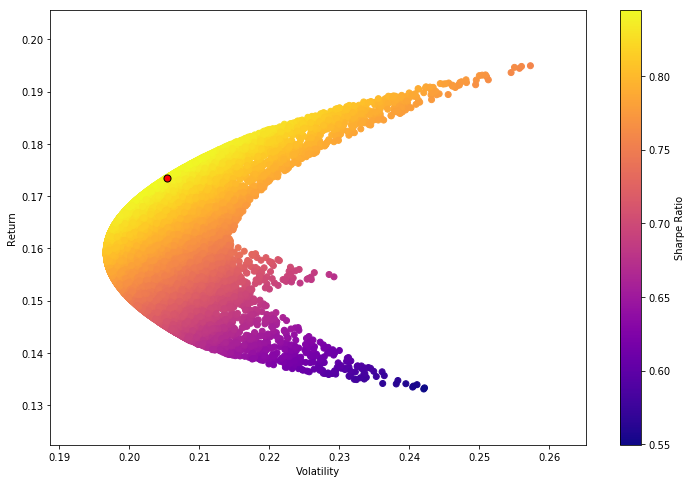

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_array,return_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sharpe_volatility,max_sharpe_return,color='red',s=50,edgecolors='black')

# Mathematical Optimization

In [37]:
def get_return_vol_sr(weights):
    weights = np.array(weights)
    returns = np.sum(log_return.mean()* weights)* 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()* 252,weights)))
    sr = returns/vol
    return np.array([returns,vol,sr])

In [38]:
from scipy.optimize import minimize

In [39]:
def neg_sharpe(weights):
    return get_return_vol_sr(weights)[2]* -1

In [40]:
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights)- 1

In [41]:
# Constraint
cons = ({'type':'eq','fun':check_sum})

In [42]:
# length of assets
bounds = ((0,1),(0,1),(0,1))

In [43]:
init_guess = [0.34,0.33,0.33]

In [44]:
# Sequential least squares programming algorithm
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [45]:
opt_results

     fun: -0.8447039921235195
     jac: array([-0.00050399, -0.000521  ,  0.00050309])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.09218333, 0.40059762, 0.50721905])

### This is mathematically the optimal allocation between these 3 stocks in order (GOOGL, MSFT, APPL)

In [48]:
opt_results.x

array([0.09218333, 0.40059762, 0.50721905])

#### Daily Returns, Volatility, Sharpe Ratio

In [49]:
get_return_vol_sr(opt_results.x)

array([0.17350404, 0.20540218, 0.84470399])

# Efficient Frontier

In [50]:
frontier_y = np.linspace(0,0.25,100)

In [51]:
def minimize_volatility(weights):
    return get_return_vol_sr(weights)[1]

In [52]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_return_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])

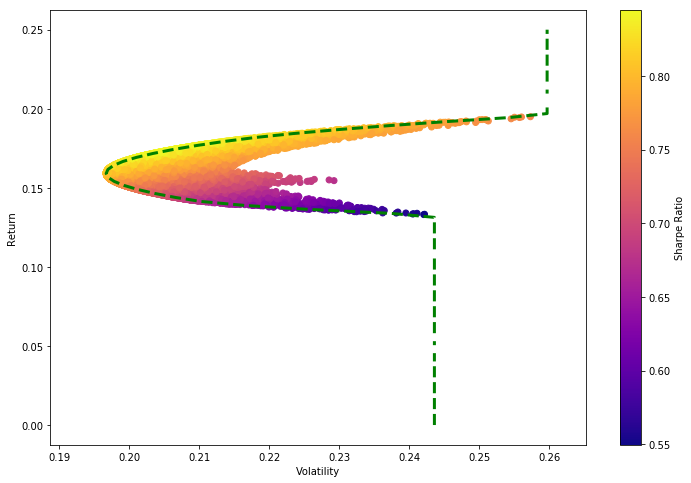

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_array,return_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

In [54]:
voo = wb.DataReader('VOO',data_source='yahoo',start='2010-01-01')
spy = wb.DataReader('SPY',data_source='yahoo',start='2010-1-1')

# Capital Asset Pricing Model(CAPM)

Portfolio Returns:

$r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

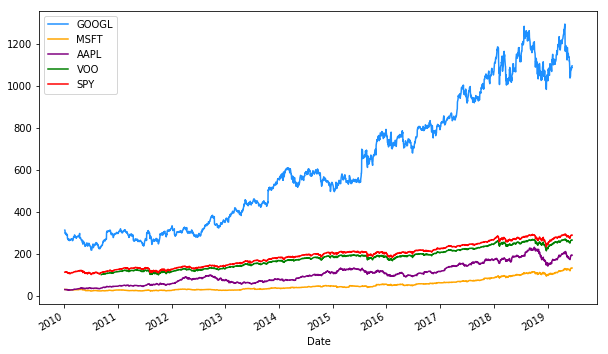

In [55]:
GOOGL['Close'].plot(label='GOOGL',figsize=(10,6),color='dodgerblue')
MSFT['Close'].plot(label='MSFT',color='orange')
AAPL['Close'].plot(label='AAPL',color='purple')
voo['Close'].plot(label='VOO',color='green')
spy['Close'].plot(label='SPY',color='red')
plt.legend()

##### The return for a stock 'i' is not going to match exactly with Beta so add alpha
##### CAPM states that you expect this alpha term to be zero
##### basically saying that you can not beat the general market

In [56]:
voo = wb.DataReader('VOO',data_source='yahoo',start='2010-01-01')
spy = wb.DataReader('SPY',data_source='yahoo',start='2010-01-01')

In [57]:
voo.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-11,267.649994,264.690002,267.250000,265.339996,1894500.0,265.339996
2019-06-12,265.700012,264.359985,265.119995,264.839996,1711900.0,264.839996
2019-06-13,266.359985,265.109985,265.820007,266.019989,1813700.0,266.019989
2019-06-14,266.290009,264.910004,265.709991,265.619995,1203300.0,265.619995
2019-06-17,266.559998,265.640015,265.940002,266.230011,760224.0,266.230011


In [58]:
GOOGL['Cumulative'] = GOOGL['Close']/GOOGL['Close'].iloc[0]
MSFT['Cumulative'] = MSFT['Close']/MSFT['Close'].iloc[0]
AAPL['Cumulative'] = AAPL['Close']/AAPL['Close'].iloc[0]
voo['Cumulative'] = voo['Close']/voo['Close'].iloc[0]
spy['Cumulative'] = spy['Close']/spy['Close'].iloc[0]

In [59]:
spy.head()

,High,Low,Open,Close,Volume,Adj Close,Cumulative
Date,,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867,1.000000
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074,1.002647
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495,1.003353
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207,1.007588
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805,1.010941


##### Cumulative return - if you had invested one dollar on the first day in 2010, this is how much it would be worth now

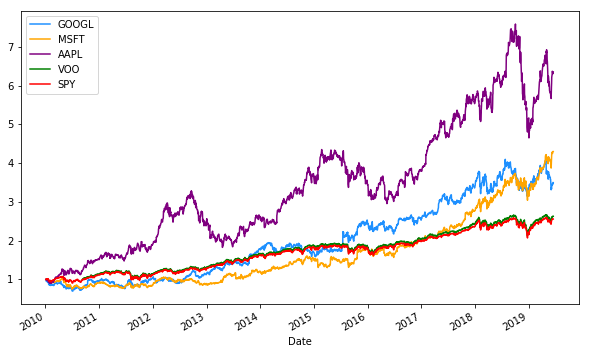

In [60]:
GOOGL['Cumulative'].plot(label='GOOGL',figsize=(10,6),color='dodgerblue')
MSFT['Cumulative'].plot(label='MSFT',color='orange')
AAPL['Cumulative'].plot(label='AAPL',color='purple')
voo['Cumulative'].plot(label='VOO',color='green')
spy['Cumulative'].plot(label='SPY',color='red')
plt.legend()

In [61]:
GOOGL['Daily Return'] = GOOGL['Close'].pct_change(1)
MSFT['Daily Return'] = MSFT['Close'].pct_change(1)
AAPL['Daily Return'] = AAPL['Close'].pct_change(1)
voo['Daily Return'] = voo['Close'].pct_change(1)
spy['Daily Return'] = spy['Close'].pct_change(1)

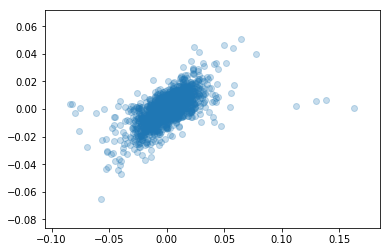

In [62]:
plt.scatter(GOOGL['Daily Return'],spy['Daily Return'],alpha=0.25)

# Beta, Alpha, R Value

In [63]:
google_beta,google_alpha,google_r_value,google_p_value,google_std_err = stats.linregress(GOOGL['Daily Return'].iloc[1:],spy['Daily Return'].iloc[1:])


In [64]:
google_beta

0.38356178849755246

In [65]:
google_alpha

0.000191667612905006

In [66]:
google_r_value

0.6312341716731718

In [67]:
noise = np.random.normal(0,0.001,len(spy['Daily Return'].iloc[1:]))

In [68]:
noise

array([ 5.37511451e-05, -1.41057526e-03,  2.65498999e-04, ...,
       -1.24969838e-04,  2.27400342e-04, -1.39497354e-03])

In [69]:
rand_stock = spy['Daily Return'].iloc[1:]+ noise

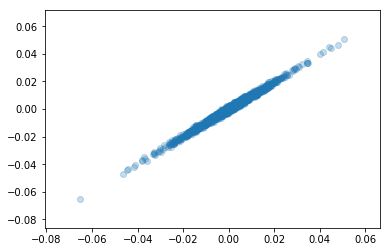

In [70]:
plt.scatter(rand_stock,spy['Daily Return'].iloc[1:],alpha=0.25)

In [71]:
rand_stock_beta,rand_stock_alpha,rand_stock_r_value,rand_stock_p_value,rand_stock_std_err = stats.linregress(rand_stock,spy['Daily Return'].iloc[1:])


In [72]:
rand_stock_beta

0.9854170825438301

In [73]:
rand_stock_alpha

-3.75274264942648e-06

# Microsoft Beta, Alpha and R Value

In [74]:
msft_beta,msft_alpha,msft_r_value,msft_p_value,msft_std_err = stats.linregress(MSFT['Daily Return'].iloc[1:],spy['Daily Return'].iloc[1:])


In [75]:
msft_beta

0.4436082550404865

In [76]:
msft_alpha

0.00012029592051670949

In [77]:
msft_r_value

0.685877830955773

# Apple Beta, Alpha and R Value

In [78]:
aapl_beta,aapl_alpha,aapl_r_value,aapl_p_value,aapl_std_err = stats.linregress(AAPL['Daily Return'].iloc[1:],spy['Daily Return'].iloc[1:])


In [79]:
aapl_beta

0.3368943614698795

In [80]:
aapl_alpha

0.00013193154881709562

In [81]:
aapl_r_value

0.5873775480582244